In [1]:
from sklearn.ensemble import RandomForestClassifier

from src import Baseline, HypothesCorrelation, HypothesDaysPercents, HypothesExtSources, HypothesDocuments, HypothesCredit, HypothesSocialCircle, HypothesWorkingHours, HypothesBadCar, HypothesContactsNumber, HypothesFamilyStatus, OnlyGoodHypotheses

# Baseline

Для обучение используется только **application_train.csv**. Категориальные признаки предобработаны dummy encoder.

In [9]:
baseline = Baseline(RandomForestClassifier(n_jobs=2, random_state=47))
baseline.get_submission('baseline')

Model fitted
ROC-AUC on validation data = 0.7067439666778486
Submission file saved to 'submissions/baseline.csv'


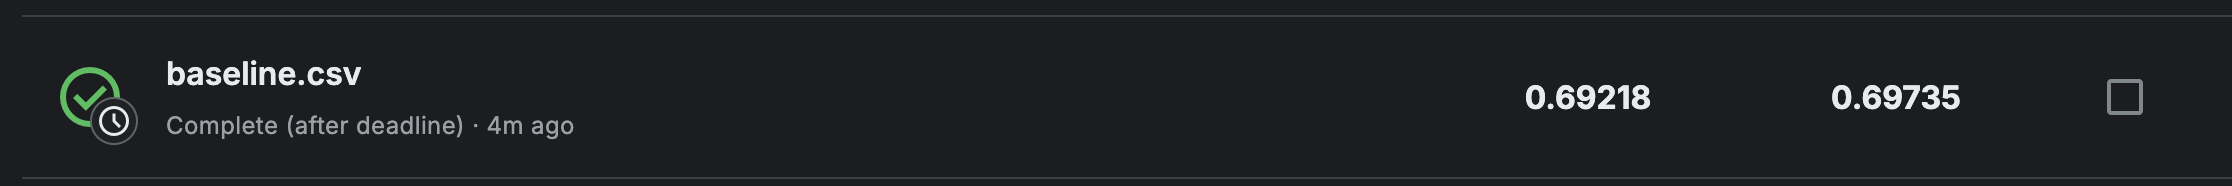
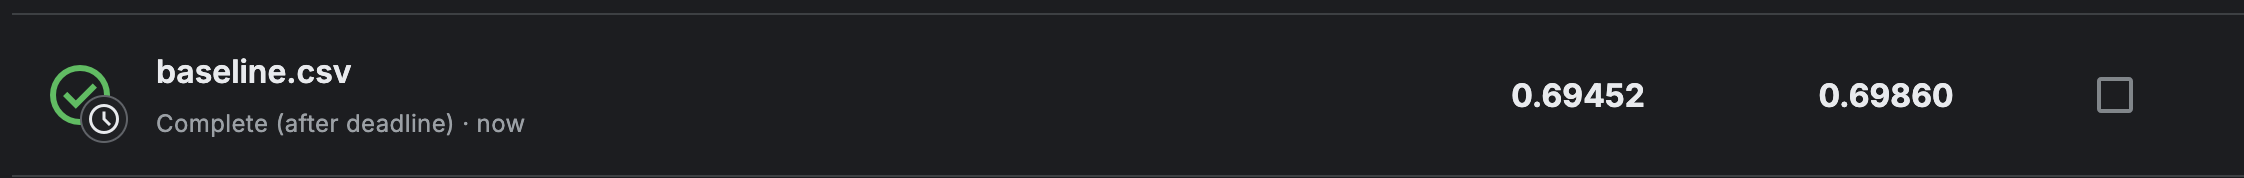
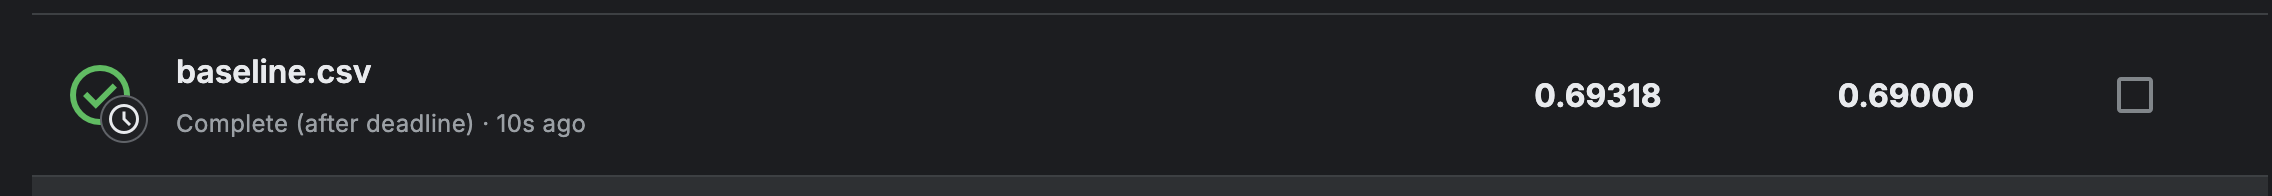

In [10]:
baseline.get_feature_importance().head(20)

,importances,feature
28,0.053122,EXT_SOURCE_2
29,0.052211,EXT_SOURCE_3
6,0.035995,DAYS_BIRTH
9,0.035177,DAYS_ID_PUBLISH
8,0.034423,DAYS_REGISTRATION
7,0.032851,DAYS_EMPLOYED
3,0.032198,AMT_ANNUITY
77,0.031179,DAYS_LAST_PHONE_CHANGE
2,0.029979,AMT_CREDIT
5,0.027874,REGION_POPULATION_RELATIVE


# Гипотеза 1

Удаление признаков, у которых высокая корреляция (>75%), потому что такие фичи избыточны

Корреляция ищется у признаков типа **float**. Фукнция - delete_high_correlation_features в файле *src/data_preprocessor.py*

In [11]:
hypothes_corr = HypothesCorrelation(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_corr.get_submission('hypothes_corr')

Model fitted
ROC-AUC on validation data = 0.7093873728085925
Submission file saved to 'submissions/hypothes_corr.csv'


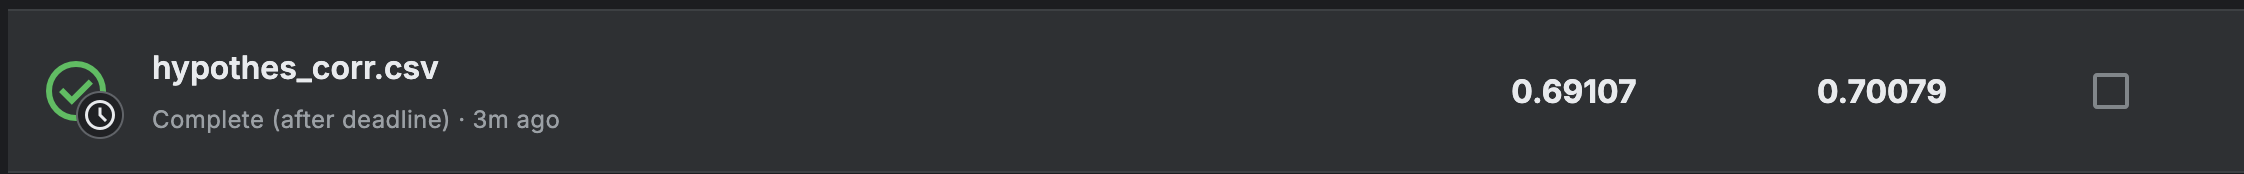
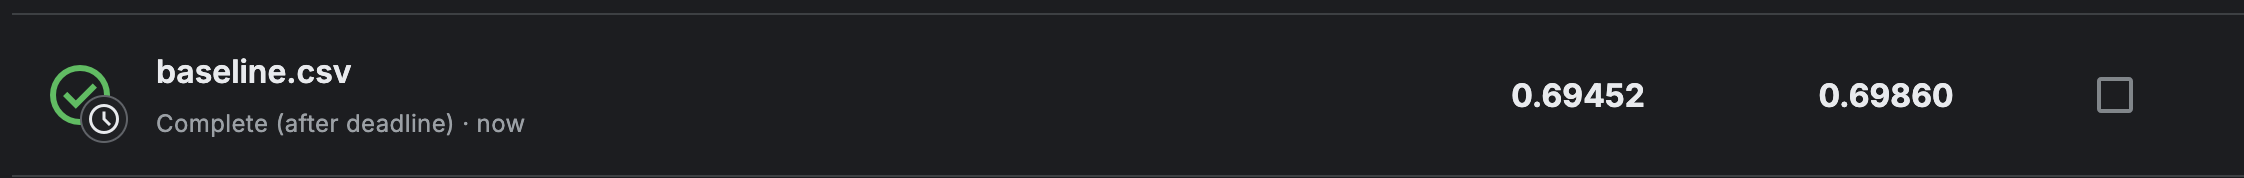
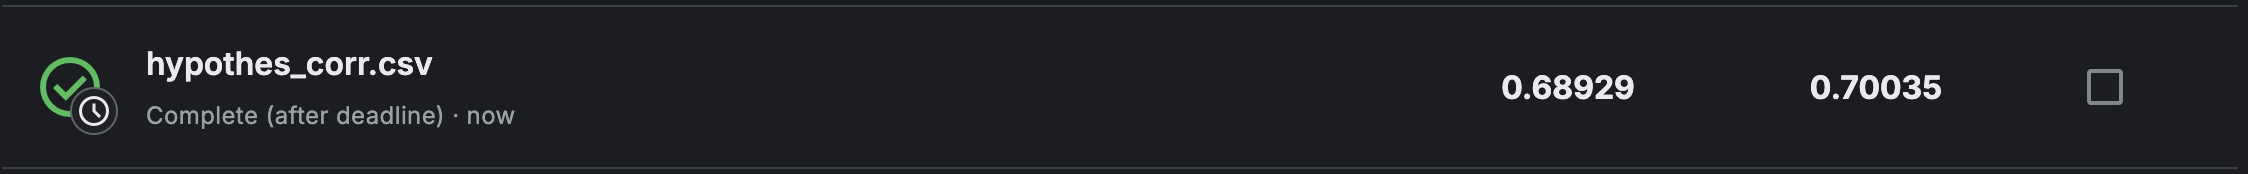
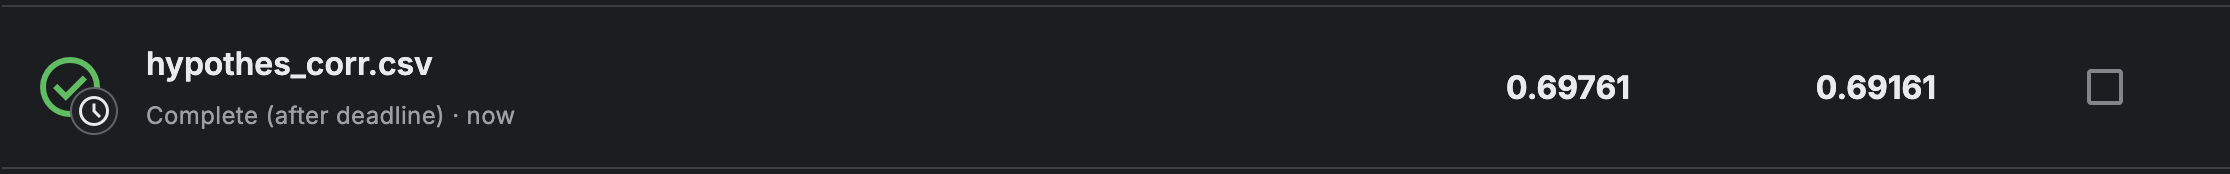

In [12]:
hypothes_corr.get_feature_importance().head(20)

,importances,feature
28,0.052945,EXT_SOURCE_2
29,0.051682,EXT_SOURCE_3
6,0.035792,DAYS_BIRTH
9,0.034875,DAYS_ID_PUBLISH
8,0.034698,DAYS_REGISTRATION
7,0.033019,DAYS_EMPLOYED
3,0.032003,AMT_ANNUITY
77,0.031219,DAYS_LAST_PHONE_CHANGE
2,0.029966,AMT_CREDIT
5,0.028003,REGION_POPULATION_RELATIVE


# Гипотеза 2

Фичи
1. 'DAYS_EMP_BIRTH_PERCENT' = `'DAYS_EMPLOYED' / 'DAYS_BIRTH'` - чем выше доля труда в жизни, тем стабильнее занятость -> ниже риск не выплатить кредит
2. 'DAYS_REG_BIRTH_PERCENT' = `'DAYS_REGISTRATION' / 'DAYS_BIRTH'` - чем больше человек прописан в одном месте, тем стабильнее его жизнь: работа, семья и тд. чем меньше процент, тем нестабильней соответсвенно -> выше риск не выплатить кредит
3. 'DAYS_PUB_BIRTH_PERCENT' = `'DAYS_ID_PUBLISH' / 'DAYS_BIRTH'` - тут тоже, чем старее айди, тем чел стабильнее -> ниже риск не выплаты

In [13]:
hypothes_days_percents = HypothesDaysPercents(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_days_percents.get_submission('hypothes_days_percents')

Model fitted
ROC-AUC on validation data = 0.7157494757027614
Submission file saved to 'submissions/hypothes_days_percents.csv'


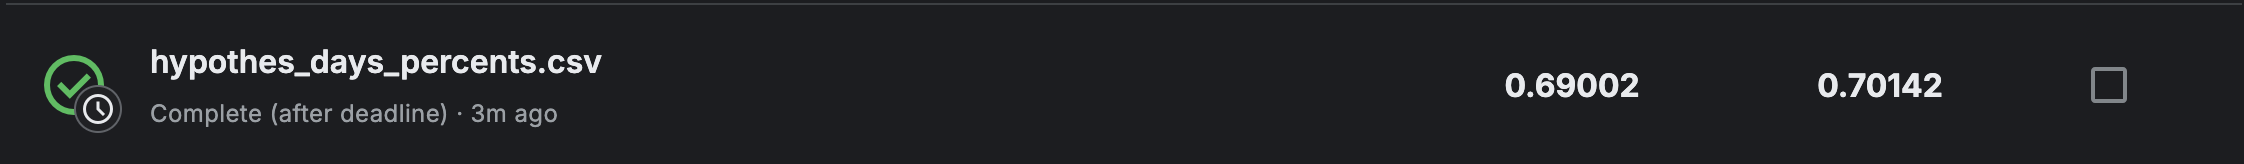
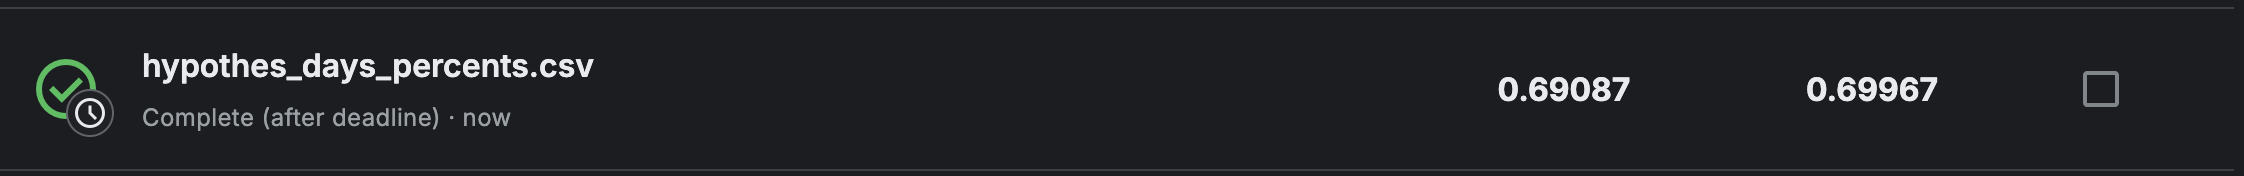
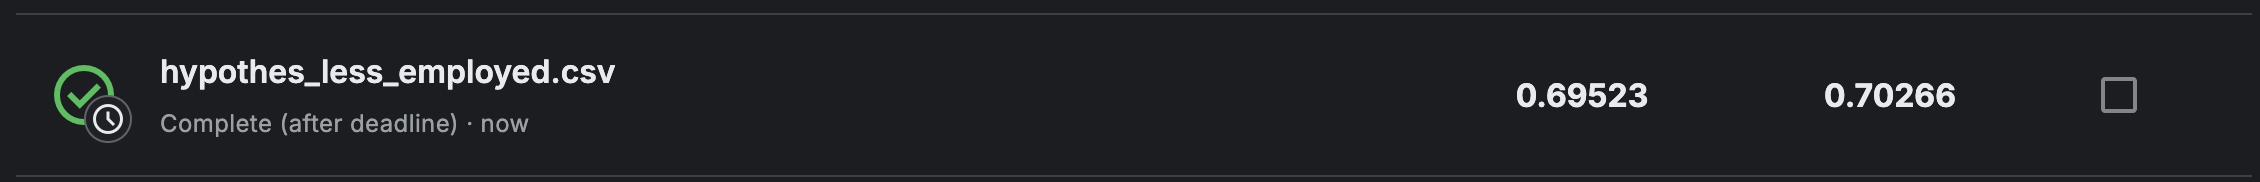

In [14]:
hypothes_days_percents.get_feature_importance().head(20)

,importances,feature
28,0.049460,EXT_SOURCE_2
29,0.048526,EXT_SOURCE_3
6,0.032177,DAYS_BIRTH
106,0.030570,DAYS_PUB_BIRTH_PERCENT
9,0.030467,DAYS_ID_PUBLISH
8,0.030198,DAYS_REGISTRATION
105,0.029710,DAYS_REG_BIRTH_PERCENT
3,0.028735,AMT_ANNUITY
7,0.028368,DAYS_EMPLOYED
77,0.028106,DAYS_LAST_PHONE_CHANGE


# Гипотеза 3

У EXT_SOURCE_* высокий импортанс.

Новые фичи - агрегации трех ext_source:
1. min
2. max
3. mean
4. std
5. min / max
6. взвешенное среднее. коэфы 5, 3, 1 в соответсвии с импортансом

In [15]:
hypothes_ext_sources = HypothesExtSources(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_ext_sources.get_submission('hypothes_ext_sources')

Model fitted
ROC-AUC on validation data = 0.7168964064524004
Submission file saved to 'submissions/hypothes_ext_sources.csv'


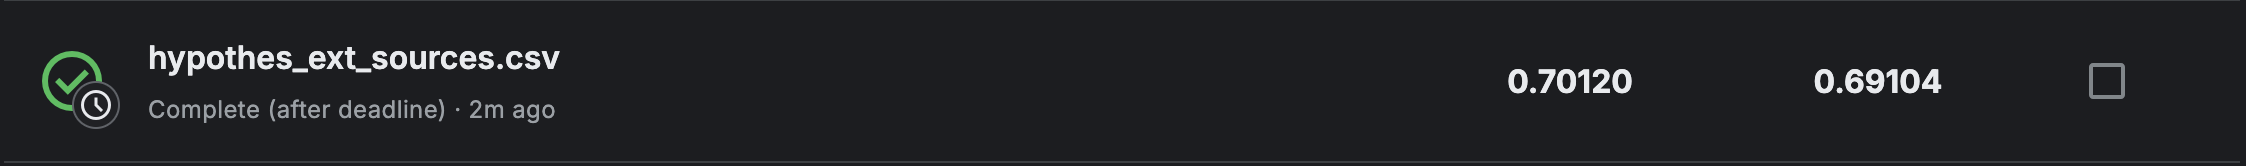
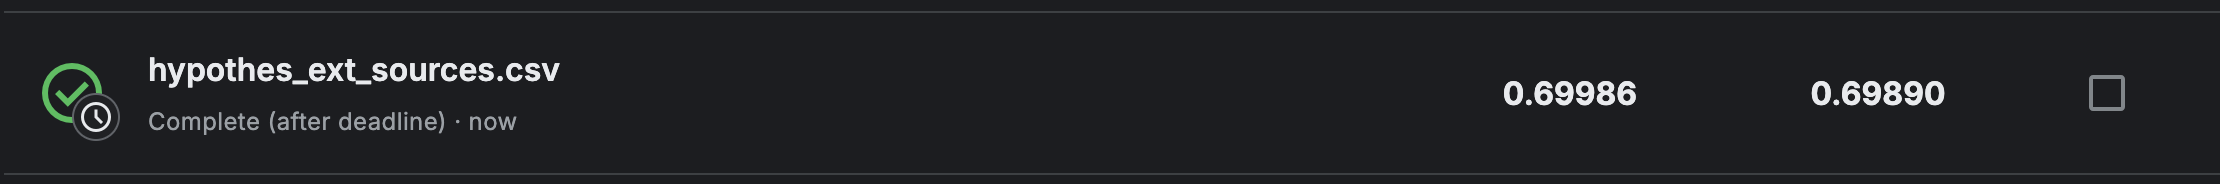
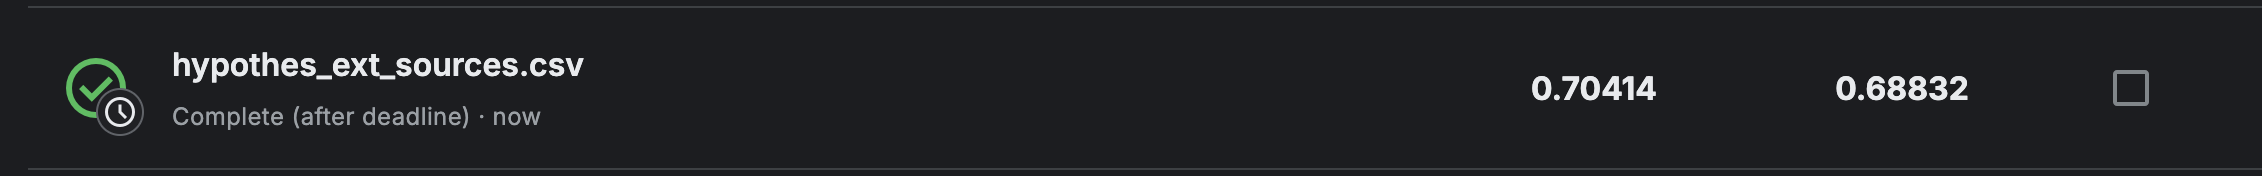

In [16]:
hypothes_ext_sources.get_feature_importance().head(20)

,importances,feature
109,0.038756,EXT_SOURCE_MEAN
107,0.034711,EXT_SOURCE_MIN
28,0.030846,EXT_SOURCE_2
108,0.030610,EXT_SOURCE_MAX
29,0.030221,EXT_SOURCE_3
6,0.026141,DAYS_BIRTH
110,0.025822,EXT_SOURCE_STD
106,0.025613,DAYS_PUB_BIRTH_PERCENT
9,0.025482,DAYS_ID_PUBLISH
111,0.024919,EXT_SOURCE_MIN_MAX_DIV


# Гипотеза 4

При наличии у человека доков (фичи FLAG_DOC) выше шанс что кредит будет просроченым. Новая фича - кол-во доков у чела.

In [17]:
hypothes_docs = HypothesDocuments(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_docs.get_submission('hypothes_docs')

Model fitted
ROC-AUC on validation data = 0.7196525418538633
Submission file saved to 'submissions/hypothes_docs.csv'


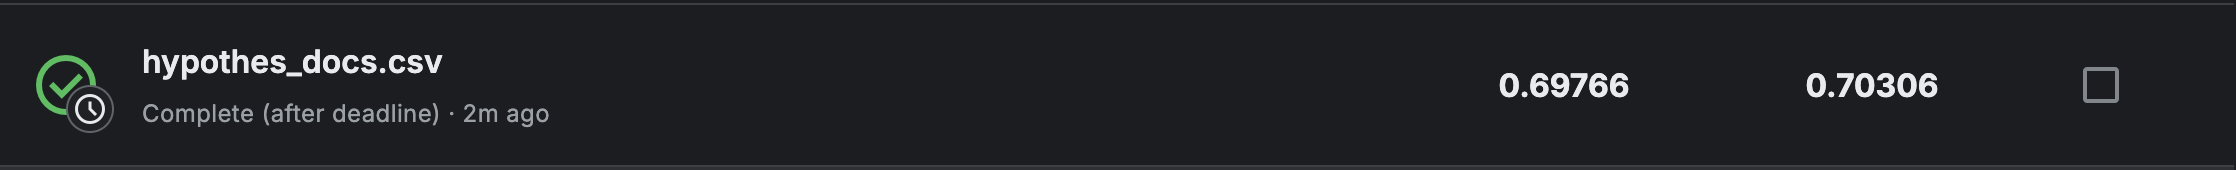
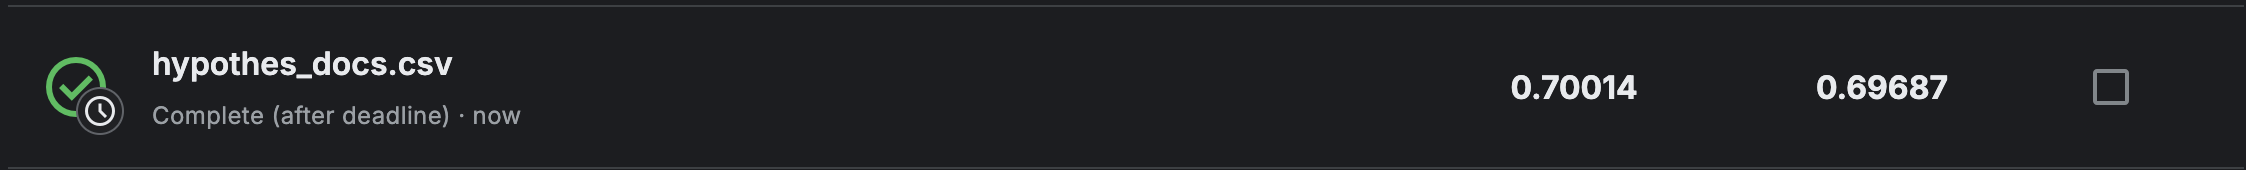
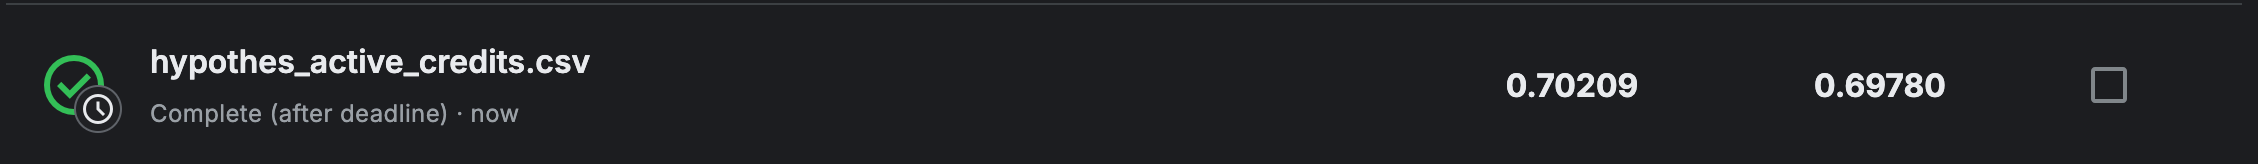

In [18]:
hypothes_docs.get_feature_importance().head(20)

,importances,feature
109,0.038894,EXT_SOURCE_MEAN
107,0.034278,EXT_SOURCE_MIN
108,0.031629,EXT_SOURCE_MAX
28,0.031218,EXT_SOURCE_2
29,0.029136,EXT_SOURCE_3
110,0.025882,EXT_SOURCE_STD
6,0.025790,DAYS_BIRTH
106,0.025616,DAYS_PUB_BIRTH_PERCENT
9,0.025050,DAYS_ID_PUBLISH
8,0.025046,DAYS_REGISTRATION


# Гипотеза 5

Фичи:
1. Во сколько годовых кредитов обошелся кредитов. Для различия мелких и крупных кредитов относительно дохода.
2. Отношение платежа к кредиту. Чем выше платеж, тем короче кредит и наоборот. может сказаться на платежеспособности
3. Срок кредит - отношение платежа к сумме кредита. Короткие и длинные сроки несут разный риск.
4. Размер первоначального взноса. Наличие его говорит о дисципилине и тд у клиента.

In [19]:
hypothes_social_circle = HypothesCredit(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_social_circle.get_submission('hypothes_credit')

Model fitted
ROC-AUC on validation data = 0.7231896441341704
Submission file saved to 'submissions/hypothes_credit.csv'


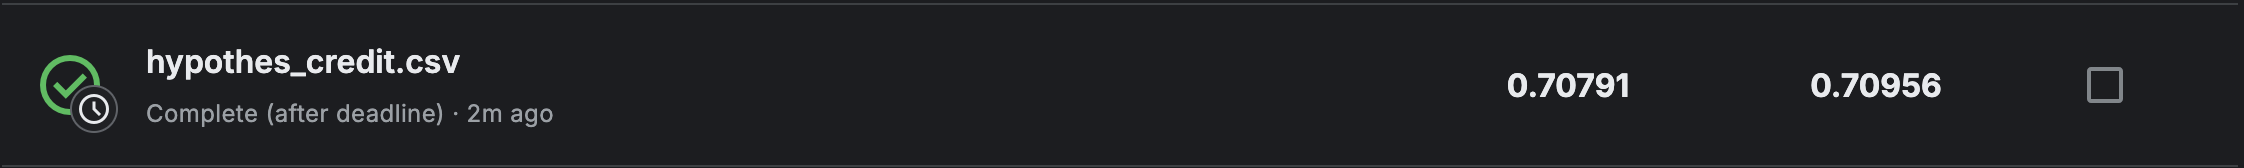
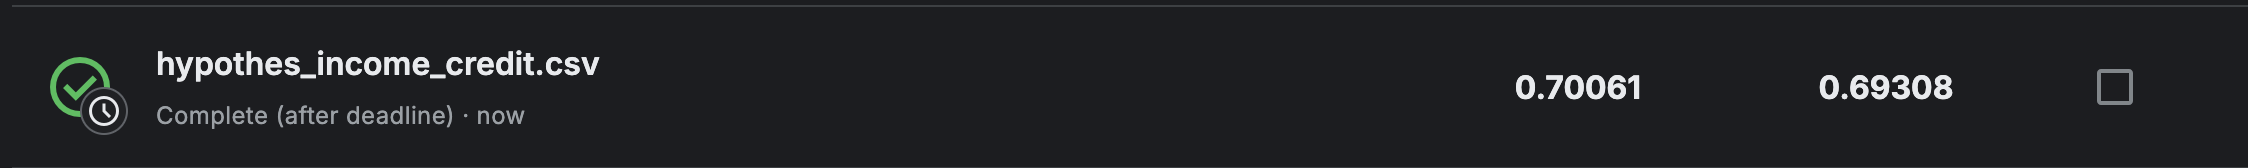
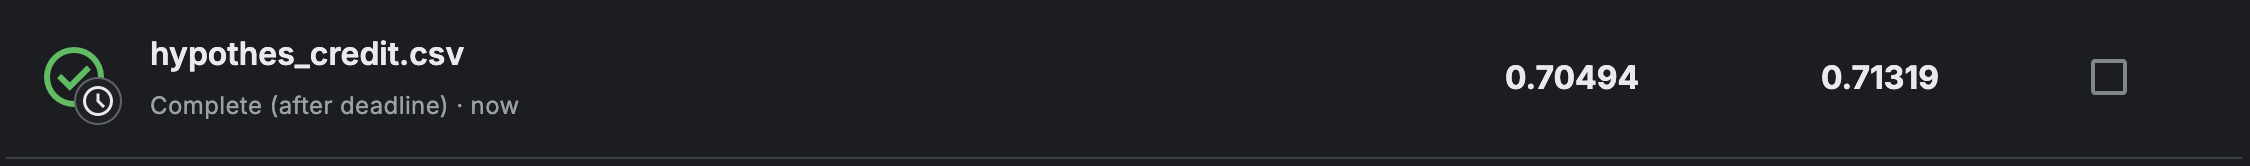
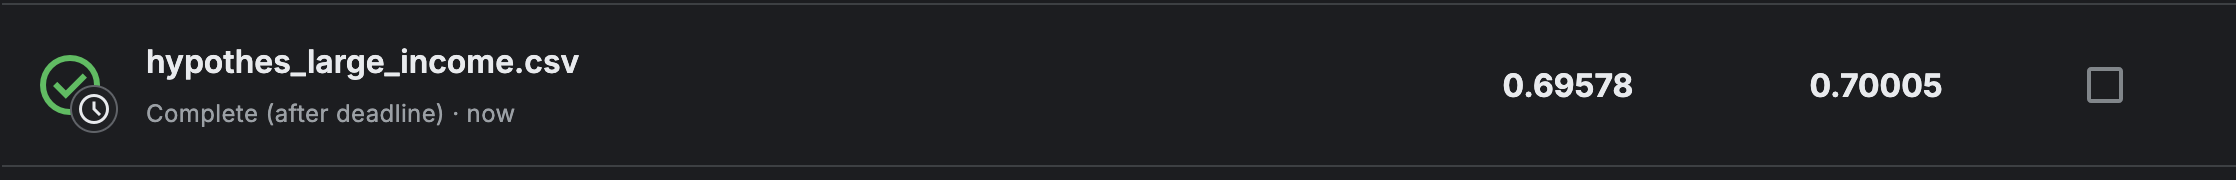

In [20]:
hypothes_social_circle.get_feature_importance().head(20)

,importances,feature
109,0.037045,EXT_SOURCE_MEAN
107,0.031228,EXT_SOURCE_MIN
108,0.029387,EXT_SOURCE_MAX
28,0.028118,EXT_SOURCE_2
29,0.027580,EXT_SOURCE_3
110,0.023971,EXT_SOURCE_STD
6,0.023666,DAYS_BIRTH
111,0.023209,EXT_SOURCE_MIN_MAX_DIV
106,0.022829,DAYS_PUB_BIRTH_PERCENT
9,0.022742,DAYS_ID_PUBLISH


# Гипотеза 6

Если у человка в окружении есть чел с дефолтом, то вероятность дефолта выше.

In [21]:
hypothes_social_circle = HypothesSocialCircle(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_social_circle.get_submission('hypothes_social_circle')

Model fitted
ROC-AUC on validation data = 0.7171014165000504
Submission file saved to 'submissions/hypothes_social_circle.csv'


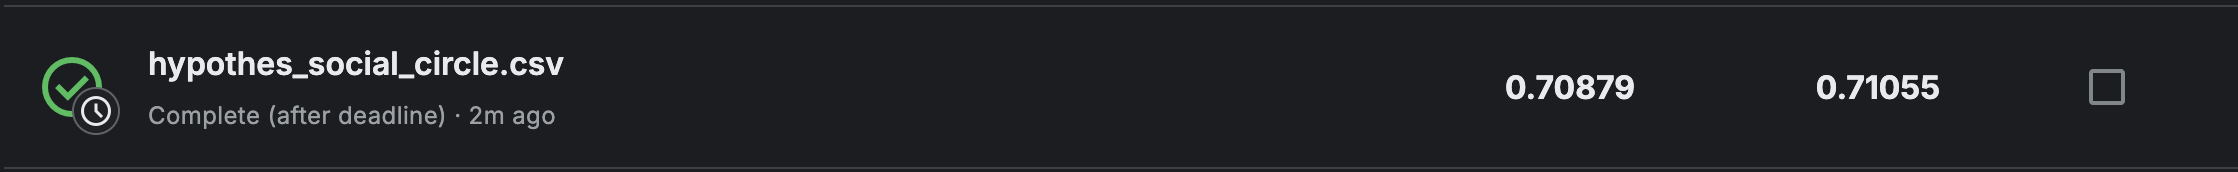
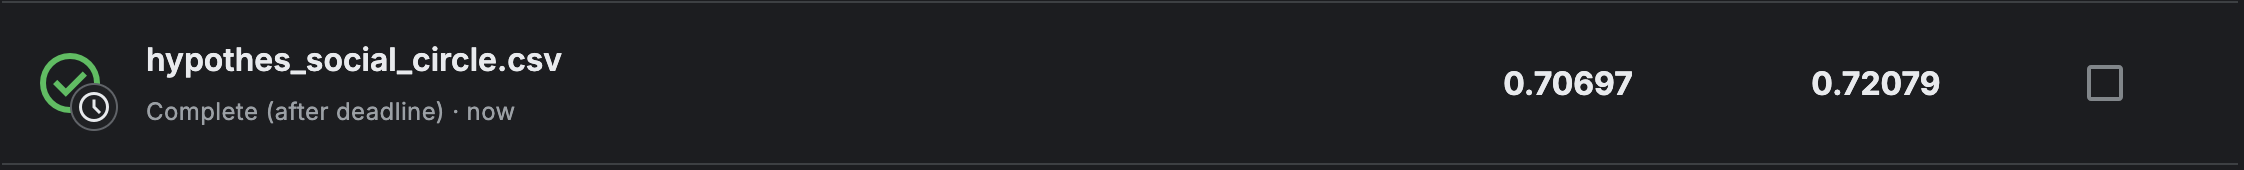

In [22]:
hypothes_social_circle.get_feature_importance().head(20)

,importances,feature
109,0.034296,EXT_SOURCE_MEAN
108,0.031379,EXT_SOURCE_MAX
107,0.031257,EXT_SOURCE_MIN
28,0.029330,EXT_SOURCE_2
29,0.028569,EXT_SOURCE_3
111,0.023829,EXT_SOURCE_MIN_MAX_DIV
6,0.023652,DAYS_BIRTH
110,0.023497,EXT_SOURCE_STD
106,0.022856,DAYS_PUB_BIRTH_PERCENT
9,0.022507,DAYS_ID_PUBLISH


# Гипотеза 7

Заявки в нерабочие часы - плохо, потому что они сделаны в спешке/незапланированые.

In [23]:
hypothes_working_hours = HypothesWorkingHours(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_working_hours.get_submission('hypothes_working_hours')

Model fitted
ROC-AUC on validation data = 0.7266625522373173
Submission file saved to 'submissions/hypothes_working_hours.csv'


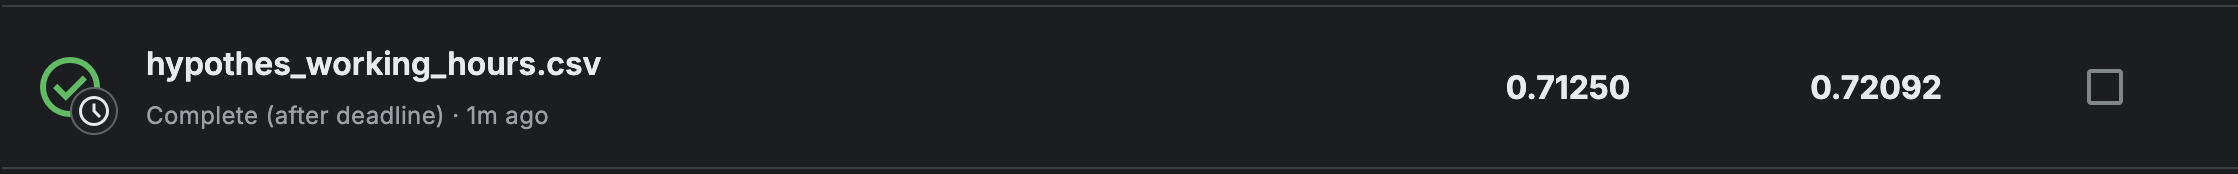
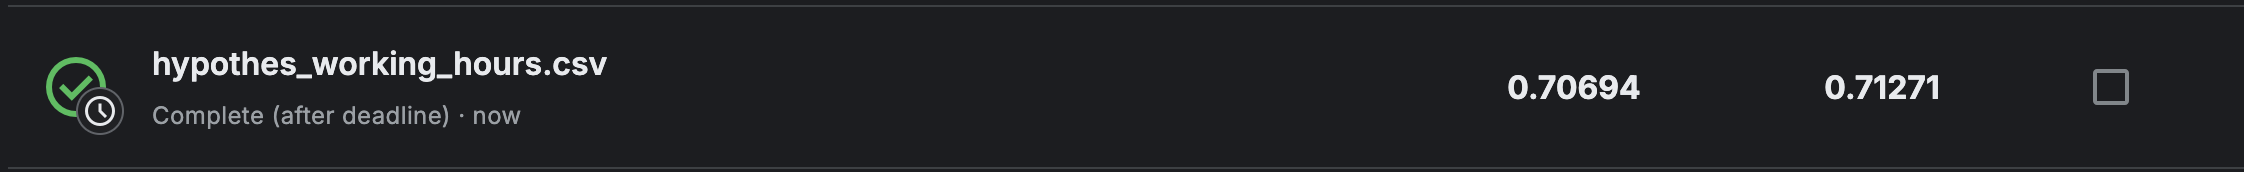

In [24]:
hypothes_working_hours.get_feature_importance().head(20)

,importances,feature
109,0.036282,EXT_SOURCE_MEAN
107,0.031363,EXT_SOURCE_MIN
28,0.029464,EXT_SOURCE_2
29,0.028282,EXT_SOURCE_3
108,0.027520,EXT_SOURCE_MAX
110,0.023794,EXT_SOURCE_STD
6,0.023722,DAYS_BIRTH
111,0.023267,EXT_SOURCE_MIN_MAX_DIV
106,0.022947,DAYS_PUB_BIRTH_PERCENT
8,0.022635,DAYS_REGISTRATION


# Гипотеза 8

Отстутсвие автомобиля или возраст авто больше 10 лет -> повышенный риск дефолта, потому что это говорит о низком уровне жизни и возможных непредвиденных расходах на ремонт.

In [25]:
hypothes_bad_car = HypothesBadCar(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_bad_car.get_submission('hypothes_bad_car')

Model fitted
ROC-AUC on validation data = 0.7211277502625022
Submission file saved to 'submissions/hypothes_bad_car.csv'


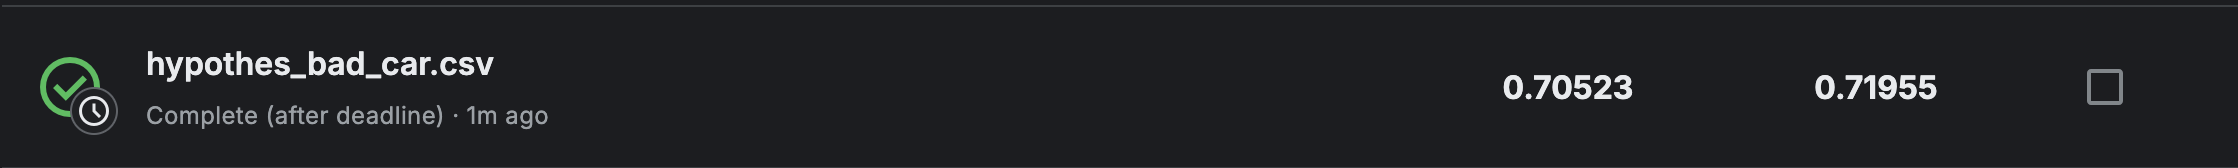
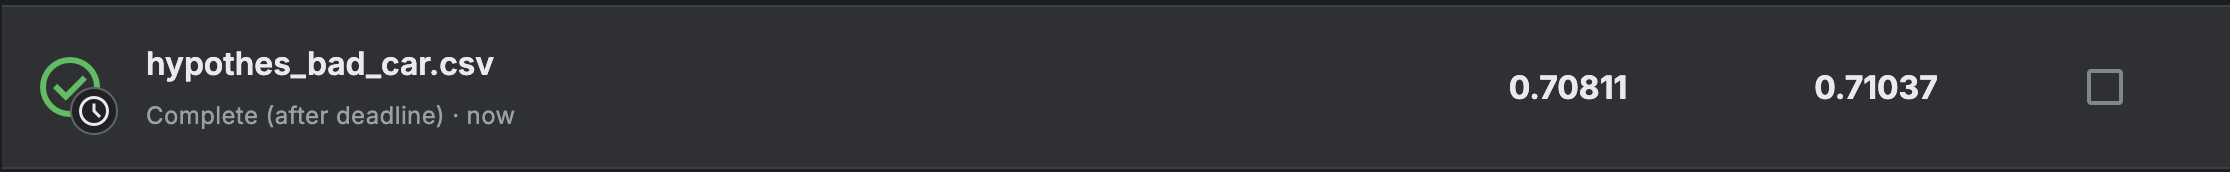

In [26]:
hypothes_bad_car.get_feature_importance().head(20)

,importances,feature
109,0.035561,EXT_SOURCE_MEAN
107,0.032772,EXT_SOURCE_MIN
108,0.030830,EXT_SOURCE_MAX
28,0.027809,EXT_SOURCE_2
29,0.027757,EXT_SOURCE_3
6,0.023809,DAYS_BIRTH
110,0.023627,EXT_SOURCE_STD
106,0.023142,DAYS_PUB_BIRTH_PERCENT
111,0.023015,EXT_SOURCE_MIN_MAX_DIV
9,0.022916,DAYS_ID_PUBLISH


# Гипотеза 9

Наличие контактов. Если у чела один или вообще ноль контактов, то говорит о проблемах при взаимодействии банков с клиентом.

In [27]:
hypothes_contacts_number = HypothesContactsNumber(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_contacts_number.get_submission('hypothes_contacts_number')

Model fitted
ROC-AUC on validation data = 0.722818577842658
Submission file saved to 'submissions/hypothes_contacts_number.csv'


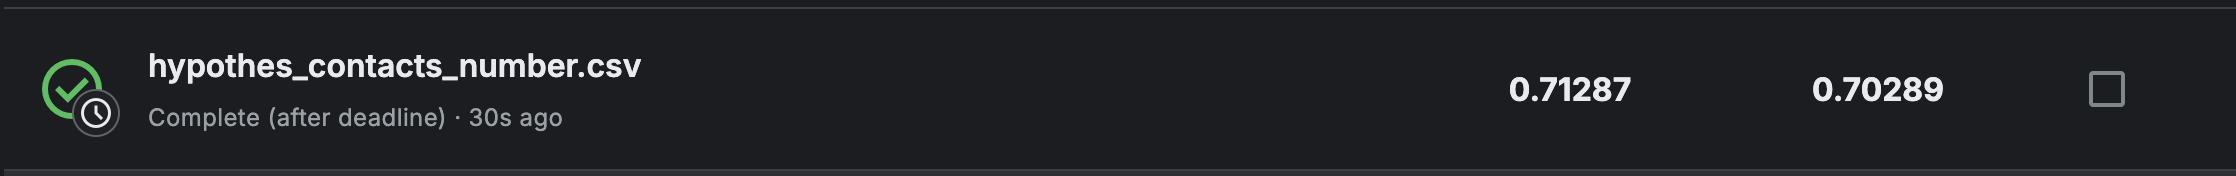
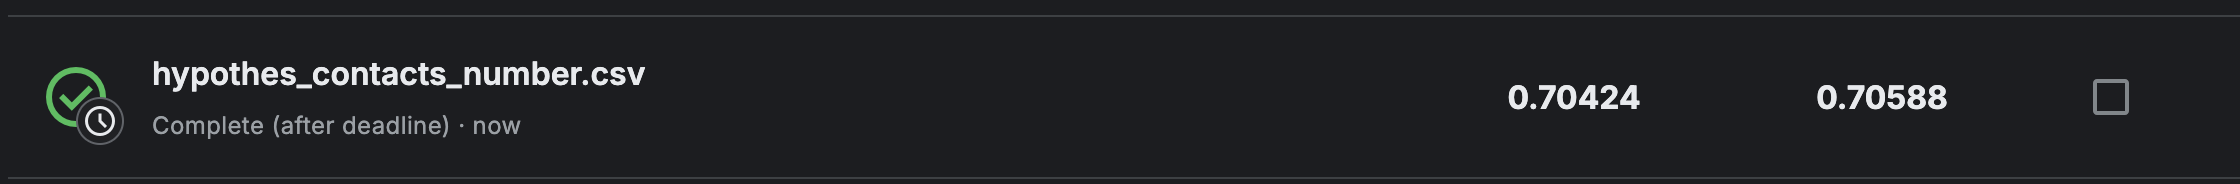

In [28]:
hypothes_contacts_number.get_feature_importance().head(20)

,importances,feature
109,0.036248,EXT_SOURCE_MEAN
107,0.031501,EXT_SOURCE_MIN
108,0.029036,EXT_SOURCE_MAX
28,0.028824,EXT_SOURCE_2
29,0.028161,EXT_SOURCE_3
6,0.023445,DAYS_BIRTH
110,0.023080,EXT_SOURCE_STD
106,0.022689,DAYS_PUB_BIRTH_PERCENT
9,0.022574,DAYS_ID_PUBLISH
111,0.022524,EXT_SOURCE_MIN_MAX_DIV


# Гипотеза 10

Одинокие и разведенные клиенты дефолят чаще, тк общий доход семьи снижает риск неплатежей.

In [29]:
hypothes_family_status = HypothesFamilyStatus(RandomForestClassifier(n_jobs=2, random_state=47))
hypothes_family_status.get_submission('hypothes_family_status')

Model fitted
ROC-AUC on validation data = 0.7263458076951613
Submission file saved to 'submissions/hypothes_family_status.csv'


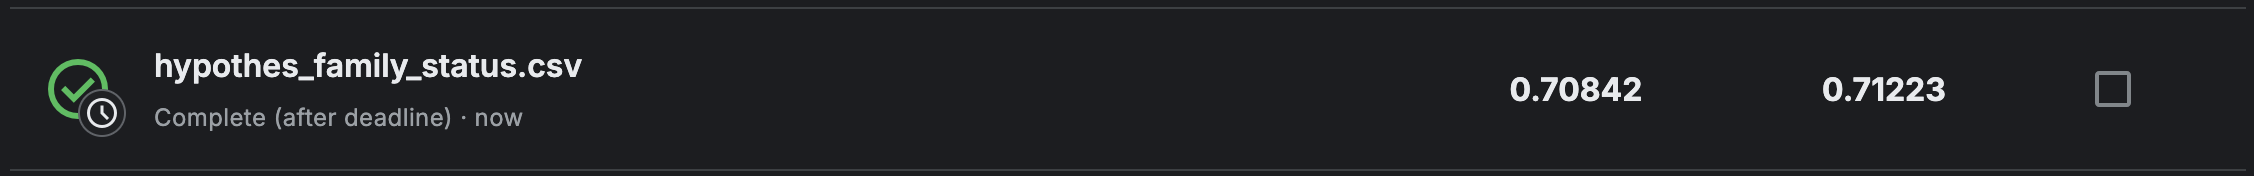
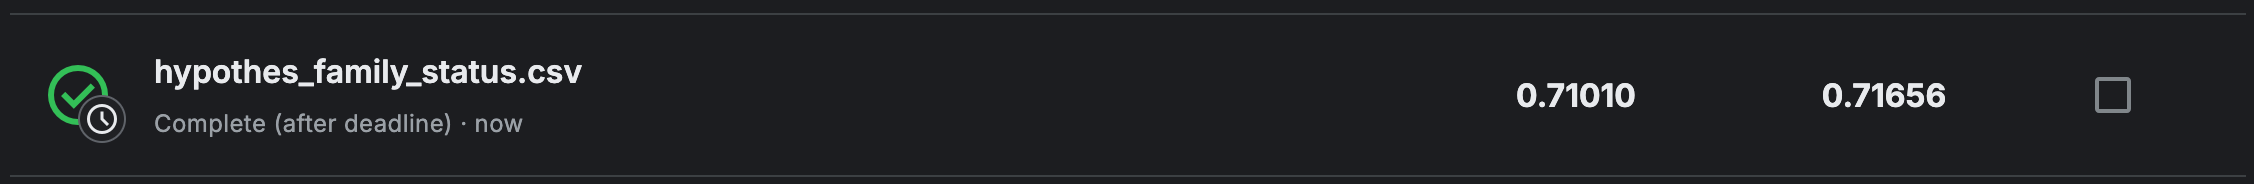

In [30]:
hypothes_family_status.get_feature_importance().head(20)

,importances,feature
109,0.034329,EXT_SOURCE_MEAN
107,0.031231,EXT_SOURCE_MIN
28,0.029910,EXT_SOURCE_2
108,0.029859,EXT_SOURCE_MAX
29,0.027714,EXT_SOURCE_3
110,0.023665,EXT_SOURCE_STD
6,0.023486,DAYS_BIRTH
9,0.022845,DAYS_ID_PUBLISH
106,0.022789,DAYS_PUB_BIRTH_PERCENT
111,0.022775,EXT_SOURCE_MIN_MAX_DIV


# Подбор гиперпараметров грид сёрчом

In [ ]:
model = HypothesFamilyStatus(RandomForestClassifier(n_jobs=3), params_grid={
    'n_estimators': range(100, 1501, 300),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}, n=10000)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Model fitted
ROC-AUC on validation data = 0.7471503190613422
Best model params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 400}
Submission file saved to 'submissions/hyperparams.csv'


In [2]:
model = OnlyGoodHypotheses(RandomForestClassifier(n_estimators=400, criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=10, n_jobs=3, random_state=47))
model.get_submission('hyperparams')

Model fitted
ROC-AUC on validation data = 0.7426785370296118
Submission file saved to 'submissions/hyperparams.csv'


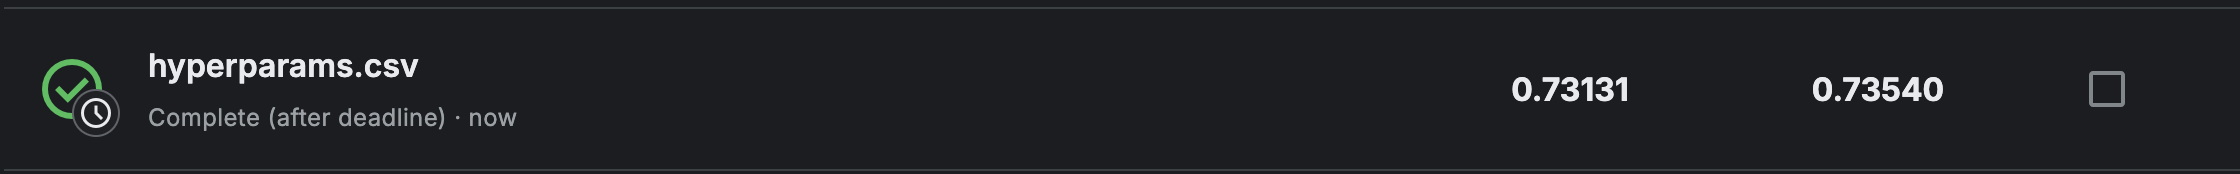
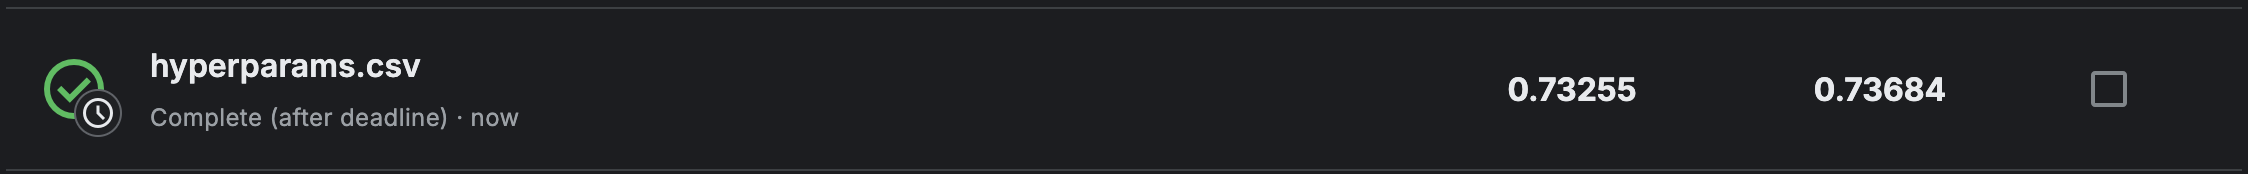